In [1]:
import glob
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

from os.path import join

sns.set_style("ticks")

In [2]:
def load_global_cifar_data() -> pd.DataFrame:
    frames = []
    paths = glob.glob(join("results", "cifar", "*.csv"))
    for p in paths:
        if "global" in p.lower():
            f = pd.read_csv(p)
            alg = p.split(os.sep)[-1].split("_")[-1].split(".")[0].title()
            f["Algorithm"] = [alg] * len(f)
            frames.append(f)
    df = pd.concat(frames)
    df["Data"] = ["CIFAR-10"] * len(df)
    return df

def load_global_mnist_data() -> pd.DataFrame:
    frames = []
    paths = glob.glob(join("results", "mnist", "*.csv"))
    for p in paths:
        if "global" in p.lower():
            f = pd.read_csv(p)
            alg = p.split(os.sep)[-1].split("_")[-1].split(".")[0].title()
            f["Algorithm"] = [alg] * len(f)
            frames.append(f)
    df = pd.concat(frames)
    df["Data"] = ["MNIST"] * len(df)
    return df

def load_global_fmnist_data() -> pd.DataFrame:
    frames = []
    paths = glob.glob(join("results", "fmnist", "*.csv"))
    for p in paths:
        if "global" in p.lower():
            f = pd.read_csv(p)
            alg = p.split(os.sep)[-1].split("_")[-1].split(".")[0].title()
            f["Algorithm"] = [alg] * len(f)
            frames.append(f)
    df = pd.concat(frames)
    df["Data"] = ["FMNIST"] * len(df)
    return df

def load_all_global_data() -> pd.DataFrame:
    funcs = [load_global_cifar_data, load_global_mnist_data, load_global_fmnist_data]
    frames = []
    for f in funcs:
        frames.append(f())
    return pd.concat(frames)

In [19]:
data = load_all_global_data()
data.head()

,Unnamed: 0,Average Loss Train,C,Communication Cost,Large Test Accuracy,Large Test Loss,Round,SDS Accuracy,SDS Loss,Workers Number,Algorithm,Data
0,0,1.204578,0.3,11.801734,9.0,2.303113,0,13.0,2.303466,40.0,Cho,CIFAR-10
1,1,0.950198,0.3,12.705425,10.0,2.302962,1,9.0,2.303113,40.0,Cho,CIFAR-10
2,2,0.781213,0.3,12.703015,10.0,2.301625,2,10.0,2.302962,40.0,Cho,CIFAR-10
3,3,0.707120,0.3,12.911989,11.0,2.300489,3,10.0,2.301625,40.0,Cho,CIFAR-10
4,4,0.694299,0.3,13.969212,12.0,2.300269,4,11.0,2.300489,40.0,Cho,CIFAR-10


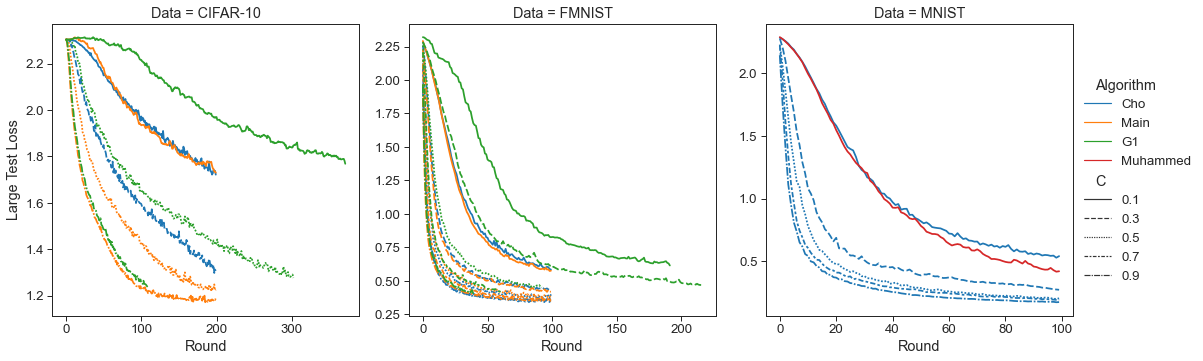

In [34]:
with sns.plotting_context("paper", font_scale=1.5):
    sns.relplot(
        data=data, 
        kind="line", 
        x="Round", 
        y="Large Test Loss", 
        col="Data", 
        col_order=["CIFAR-10", "FMNIST", "MNIST"],
        style="C", 
        hue="Algorithm", 
        ci=None,
        facet_kws={"despine": False, "sharex": False, "sharey": False},
        linewidth=1.75
    )
    plt.savefig(join("plots", "test_loss.pdf"))
    plt.show()

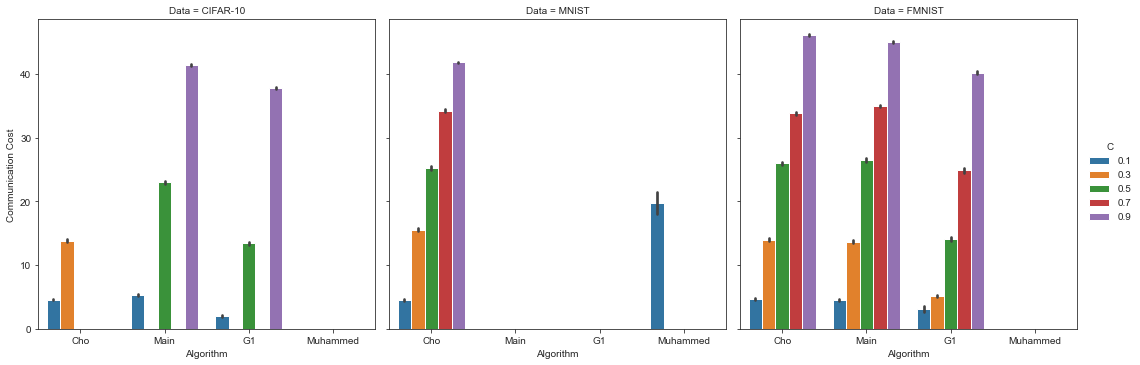

In [16]:
sns.catplot(
    data=data, 
    kind="bar", 
    x="Algorithm", 
    y="Communication Cost", 
    col="Data", 
    hue="C",   
    facet_kws={"despine": False, "sharey": False}
)
plt.show()

In [6]:
print("G1 comm. cost:", sum(data.query("Algorithm == 'G1' and Data == 'FMNIST'")["Communication Cost"]))
print("FedAvg comm. cost:", sum(data.query("Algorithm == 'Main' and Data == 'FMNIST'")["Communication Cost"]))
print("Cho comm. cost:", sum(data.query("Algorithm == 'Cho' and Data == 'FMNIST'")["Communication Cost"]))

G1 comm. cost: 6169.50380479142
FedAvg comm. cost: 12472.453926798984
Cho comm. cost: 12466.937795549453


# Communication Reduction Ratio
Here, we show the average reduction for each $C$ value for each algorithm when compared against `FedAvg` (or `main`). This is the average reduction over all rounds in a given setup. 

We essentially measure:
$$\frac{\sum_{t} A_{t}}{\sum_{t} A_{t}^{*}}$$

where $A_t$ is the communication cost of algorithm $A$ in the $t$ time-step and $A_t^{*}$ is the communication cost of the `FedAvg` algorithm in the $t$ time-step.

In [24]:
for c in data["C"].unique():
    subdata = data.query(f"C == {c}")
    for d in subdata["Data"].unique():
        for algorithm in subdata["Algorithm"].unique():
            original = subdata.query(f"Algorithm == 'Main' and Data == '{d}'")["Communication Cost"]
            this = subdata.query(f"Algorithm == '{algorithm}' and Data == '{d}'")["Communication Cost"]
            approx = (this.sum() / original.sum())
            print(f">> C={c}, data={d}, alg={algorithm}:  {approx}")

<ipython-input-24-f3dd211f994c>:7: RuntimeWarning: divide by zero encountered in double_scalars
  approx = (this.sum() / original.sum())
<ipython-input-24-f3dd211f994c>:7: RuntimeWarning: invalid value encountered in double_scalars
  approx = (this.sum() / original.sum())
<ipython-input-24-f3dd211f994c>:7: RuntimeWarning: divide by zero encountered in double_scalars
  approx = (this.sum() / original.sum())
<ipython-input-24-f3dd211f994c>:7: RuntimeWarning: invalid value encountered in double_scalars
  approx = (this.sum() / original.sum())
<ipython-input-24-f3dd211f994c>:7: RuntimeWarning: invalid value encountered in double_scalars
  approx = (this.sum() / original.sum())
<ipython-input-24-f3dd211f994c>:7: RuntimeWarning: divide by zero encountered in double_scalars
  approx = (this.sum() / original.sum())
<ipython-input-24-f3dd211f994c>:7: RuntimeWarning: invalid value encountered in double_scalars
  approx = (this.sum() / original.sum())
<ipython-input-24-f3dd211f994c>:7: RuntimeWar